<!-- vale IBMQuantum.Definitions = NO -->
<!-- vale IBMQuantum.OxfordComma = NO -->

# CHSH game

- Example type: game; thought experiment
- Keywords: entanglement, nonlocality, Bell's theorem
- Difficulty: easy
- Requires two qubits
- Notable connection: the 2022 Nobel Prize in Physics

## Description

The CHSH game (named after its inventors: Clauser, Horne, Shimony, and Holt) shows that entanglement is real and measurable, and that its effects can give advantages in certain situations. The game is abstract, involves two players (traditionally named Alice and Bob), and is run by an impartial referee.

The CHSH game is not a traditional game that relies on luck, skill, or emotion. Rather, it's a mathematical game, used to study or evaluate a premise. In this type of logical game you can assume the "players" always act rationally, and follow the rules set for them.

> **Note:** The CHSH game is also known as a *Bell test* or *Bell experiment*.


### Game description

The two players, Alice and Bob, work together as a team. The referee sends them each a bit of data, then Alice and Bob respond to the referee. The referee evaluates their answers based on a rule sheet, and tells them if they win or lose. That's the entire game.

To make this game more difficult, Alice and Bob are physically separated and are unable to communicate with each other during the game. They can, however, share data and agree on a strategy with each other beforehand.

Here's how a round would play out:

1. The game begins with the referee choosing two bits, $x$ and $y$, uniformly at random. Alice receives $x$, and Bob receives $y$. Neither Alice or Bob can communicate about the bit they were given.

2. Alice and Bob must now each respond to the referee with a single bit as their "answer": Alice responds with a bit $a$ and Bob responds with a bit $b$ 

3. The referee consults the rules table, and determines if they won or lost.

The following figure illustrates the basic set-up:

![Nonlocal game](images/nonlocal-game.png)

And this is the rules table that the referee uses:

|The referee provides $$(x,y)$$ | Players win if: | Players lose if: |
|:---:|:---:|:---:|
|$$(0,0)$$ | $$a=b$$ | $$a\not=b$$ |
|$$(0,1)$$ | $$a=b$$ | $$a\not=b$$ |
|$$(1,0)$$ | $$a=b$$ | $$a\not=b$$ |
|$$(1,1)$$ | $$a\not=b$$ | $$a=b$$ |

To win in 3 of the possible scenarios, Alice and Bob must respond with the same answer (that is, provide matching bits) to the referee. To win in the last scenario, they must give opposite answers.

## Strategies

The game shows the advantages of entanglement by working out the player's best possible strategy in two different scenarios. In one scenario, Alice and Bob can only share classical bits with each other before the game starts. In the other scenario, they can share entangled qubits.


### Classical

If Alice and Bob can only share classical bits before the game starts, their best strategy is to always respond with the same bit (for example, both respond with `0`), regardless of the bit they receive from the referee. With this strategy, they'll win 3/4 of the time.


### Quantum

If Alice and Bob share entangled qubits in the state

$$
\vert \phi^+ \rangle = \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle
$$

before the game starts, then they can win with probability $\cos^2(\pi/8) \approx 0.85$.

The following figure shows the strategy they should use.

![Nonlocal game](images/CHSH-strategy.png)

In this figure, $R_y(\theta)$ is the operation

<!-- TODO: Ask John to make it Ry in the figure -->

$$
R_y(\theta) = \begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}
$$

for every angle $\theta$.

### Explanation

Alice and Bob could try a classical strategy that increases the probability of their answers disagreeing when the referee gives them a $1$. For example, they might decide that Alice will always answer $0$, but Bob will be more likely to answer $1$ if the referee gives him a $1$. This makes them more likely to win in the case $x=y=1$, but any benefit is cancelled out by being less likely to win in the case $x=0$ and $y=1$.

In the quantum strategy, Alice and Bob each have one qubit from the state

$$
\vert \phi^+ \rangle = \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle
$$

If Alice and Bob measure their qubits in the same basis, their results will always match. But if Alice measures in a different basis to Bob, there is a chance their results will _not_ match, and this chance increases non-linearly with the angle of separation. Specifically, the probability of the two measurements matching is $\cos(\theta/2)^2$, where $\theta$ is the angle between Alice and Bob's bases.

Alice and Bob decide to keep their bases relatively close ($\Delta \theta = \pi/4$) if the referee gives them a $ 0$, and rotate their bases in opposite directions if they're given a $ 1$. This means that when they both receive $ 1$, their bases will be furthest apart ($\Delta \theta = 3\pi/4$).

The advantage comes from the non-linearity of the relationship between the angle and the measurement. The cosine-squared function changes more slowly at small angles, so the chance of winning in the case $x=y=1$ is not fully cancelled out by the reduced chance of winning in the other cases. 

![](images/p-vs-angle.svg)

Note that this effect does not allow them to communicate, as neither player gains any information about the other's actions when they measure.

## Qiskit implementation

To implement the quantum strategy described earlier, we'll first define a function that takes the two question bits as input and produces one of four possible circuits as output.
Each circuit includes the preparation of the $\vert \phi^+\rangle$ state, as well as the rotation operations and measurements described earlier.

In [1]:
from qiskit import QuantumCircuit
from numpy import pi


def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Alice and Bob's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

Running the following code cell shows us the four possible circuits.

(x,y) = (0,0)


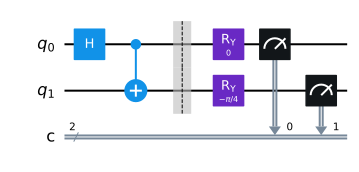

(x,y) = (0,1)


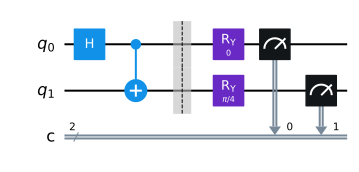

(x,y) = (1,0)


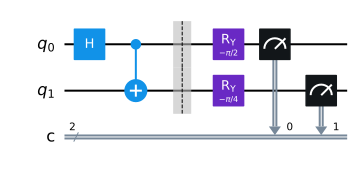

(x,y) = (1,1)


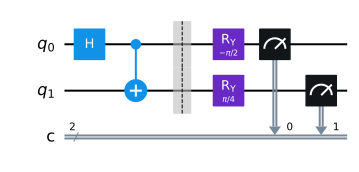

In [2]:
# Draw the four possible circuits

print(f"(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw())

print(f"(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw())

print(f"(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw())

print(f"(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw())

Next we'll define a job using the Aer simulator, which runs the circuit for a given pair of questions $(x,y)$ a single time.

In [3]:
from qiskit_aer.primitives import Sampler

sampler = Sampler()


def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    counts = (
        sampler.run(chsh_circuit(x, y), shots=1)
        .result()
        .quasi_dists[0]
        .binary_probabilities()
    )
    bits = list(counts.keys())[0]
    a, b = int(bits[0]), int(bits[1])
    return a, b

Calling the function `quantum_strategy` runs the strategy one time on a given pair of questions.

In [4]:
quantum_strategy(1, 1)

(0, 1)

To test out how well it does in the CHSH game, let's define a function that implements the game, including the random selection of the question bits. It takes an arbitrary strategy as an argument.

In [5]:
from numpy.random import randint


def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

Finally, we can pass our strategy as the argument to the `CHSH_game` function to play the game.
Let's play 1,000 times and see what fraction of games it wins.

In [6]:
NUM_GAMES = 1000
total_score = 0

for _ in range(NUM_GAMES):
    total_score += chsh_game(quantum_strategy)

print(f"Fraction of games won:", total_score / NUM_GAMES)

Fraction of games won: 0.85


We can also define a classical strategy and see how it compares. (Feel free to change the code to try out different strategies.)

In [7]:
def classical_strategy(x, y):
    """A best classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

Again let's play the game 1,000 times to see how well it works.

In [8]:
NUM_GAMES = 1000
total_score = 0

for _ in range(NUM_GAMES):
    total_score += chsh_game(classical_strategy)

print(f"Fraction of games won:", total_score / NUM_GAMES)

Fraction of games won: 0.78


## Discussion and further reading

<!-- vale off -->

Lesson 4 of the Understanding Quantum Information and Computation series, produced by IBM Quantum, covers this game and goes much more into detail about entanglement over. Watch that here - https://www.youtube.com/watch?v=GSsElSQgMbU&list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO&index=6 

The CHSH game is sometimes used as a subroutine within cryptographic protocols, as a way to force untrusted parties to follow certain instructions.

### Cited or Influential Work:

- Ben W. Reichardt, Falk Unger, Umesh Vazirani. A classical leash for a quantum system: Command of quantum systems via rigidity of CHSH games. arXiv:1209.0448

- Coladangelo, Andrea; Grilo, Alex; Jeffery, Stacey; Vidick, Thomas (January 9, 2020). "Verifier-on-a-Leash: new schemes for verifiable delegated quantum computation, with quasilinear resources". arXiv:1708.07359
 
- Grilo, Alex B. (June 5, 2020). "A simple protocol for verifiable delegation of quantum computation in one round". arXiv:1711.09585
 
- Vazirani, Umesh V.; Vidick, Thomas (November 25, 2011). "Certifiable Quantum Dice - Or, testable exponential randomness expansion". arXiv:1111.6054 
 
- Vazirani, Umesh; Vidick, Thomas (September 29, 2014). "Fully device independent quantum key distribution". Physical Review Letters. 113 (14): 140501. arXiv:1210.1810. doi:10.1103/PhysRevLett.113.140501. PMID 25325625. S2CID 119299119

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table